# TimeGAN Tutorial

## Time-series Generative Adversarial Networks

- Paper: Jinsung Yoon, Daniel Jarrett, Mihaela van der Schaar, "Time-series Generative Adversarial Networks," Neural Information Processing Systems (NeurIPS), 2019.

- Paper link: https://papers.nips.cc/paper/8789-time-series-generative-adversarial-networks

- Last updated Date: April 24th 2020

- Code author: Jinsung Yoon (jsyoon0823@gmail.com)

This notebook describes the user-guide of a time-series synthetic data generation application using timeGAN framework. We use Stock, Energy, and Sine dataset as examples.

### Prerequisite
Clone https://github.com/jsyoon0823/timeGAN.git to the current directory.

## Necessary packages and functions call

- timegan: Synthetic time-series data generation module
- data_loading: 2 real datasets and 1 synthetic datasets loading and preprocessing
- metrics: 
    - discriminative_metrics: classify real data from synthetic data
    - predictive_metrics: train on synthetic, test on real
    - visualization: PCA and tSNE analyses

In [22]:
## Necessary packages
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler

# 1. TimeGAN model
from timegan import timegan
# 2. Data loading
from data_loading import real_data_loading, sine_data_generation
# 3. Metrics
from metrics.discriminative_metrics import discriminative_score_metrics
from metrics.predictive_metrics import predictive_score_metrics
from metrics.visualization_metrics import visualization

In [23]:
df_ori = pd.read_csv('/Users/xiafei/code/itu-ml-challenge/csv/dataset.csv')
try:
    df_ori = df_ori.loc[:,(df_ori !=0).any(axis=0)]
    df_ori = df_ori.drop(columns=['Unnamed: 0'])
except:
    print('drop error')

In [24]:
print(df_ori.shape)
df_ori.head()

(9670, 662)


,p_/computes0/service/id,p_/computes0/vcpus_used,p_/computes0/vcpus,p_/computes0/memory_mb_used,p_/computes0/memory_mb,p_/computes0/cpu_info/topology/cores,p_/computes0/cpu_info/topology/cells,p_/computes0/cpu_info/topology/threads,p_/computes0/cpu_info/topology/sockets,p_/computes0/running_vms,...,v_/ports#link-tr-tr-a-1-y/metrics/network-incoming-bytes-rate,v_/ports#link-tr-tr-a-1-y/metrics/network-incoming-packets,v_/ports#link-tr-tr-a-1-y/metrics/network-incoming-packets-rate,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-bytes,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-bytes-rate,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-rate,v_/time,v_type,v_type_code
0,16,20,48,41472,257790,12,2,2,1,5,...,13.236069,1401532.0,0.100425,174853276.0,11.431817,1263588.0,0.099783,1593395580,ixnetwork-traffic-start,0
1,16,20,48,41472,257790,12,2,2,1,5,...,11.438221,1401538.0,0.099506,174854074.0,13.313681,1263595.0,0.116705,1593395640,ixnetwork-traffic-start,0
2,16,20,48,41472,257790,12,2,2,1,5,...,11.438221,1401545.0,0.099506,174854758.0,13.313681,1263601.0,0.100463,1593395700,ixnetwork-traffic-start,0
3,16,20,48,41472,257790,12,2,2,1,5,...,11.429972,1401551.0,0.099826,174855556.0,13.277844,1263608.0,0.116223,1593395760,ixnetwork-traffic-start,0
4,16,20,48,41472,257790,12,2,2,1,5,...,11.429972,1401558.0,0.116494,174856338.0,13.277844,1263615.0,0.116614,1593395820,ixnetwork-traffic-start,0


# Select type n as the original data

In [25]:
curr_type = 5

In [26]:
df_ori_typeN = df_ori[df_ori['v_type_code'] == curr_type]

In [27]:
df_ori_typeN.head()

,p_/computes0/service/id,p_/computes0/vcpus_used,p_/computes0/vcpus,p_/computes0/memory_mb_used,p_/computes0/memory_mb,p_/computes0/cpu_info/topology/cores,p_/computes0/cpu_info/topology/cells,p_/computes0/cpu_info/topology/threads,p_/computes0/cpu_info/topology/sockets,p_/computes0/running_vms,...,v_/ports#link-tr-tr-a-1-y/metrics/network-incoming-bytes-rate,v_/ports#link-tr-tr-a-1-y/metrics/network-incoming-packets,v_/ports#link-tr-tr-a-1-y/metrics/network-incoming-packets-rate,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-bytes,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-bytes-rate,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-rate,v_/time,v_type,v_type_code
282,16,20,48,41472,257790,12,2,2,1,5,...,13.322413,1418712.0,0.117148,211089956.0,11.396969,1295740.0,0.116821,1593412500,tap-loss-start,5
283,16,20,48,41472,257790,12,2,2,1,5,...,14.234634,1418719.0,0.116205,211090754.0,14.297662,1295747.0,0.116983,1593412560,tap-loss-start,5
284,16,20,48,41472,257790,12,2,2,1,5,...,12.589926,1418726.0,0.116794,211091438.0,13.240228,1295753.0,0.099260,1593412620,tap-loss-start,5
285,16,20,48,41472,257790,12,2,2,1,5,...,13.288430,1418732.0,0.116794,211092122.0,11.420076,1295759.0,0.099960,1593412680,tap-loss-start,5
286,16,20,48,41472,257790,12,2,2,1,5,...,11.379676,1418738.0,0.100191,211092920.0,13.354185,1295766.0,0.116854,1593412740,tap-loss-start,5


In [28]:
df_ori_typeN.shape

(1707, 662)

<AxesSubplot:>

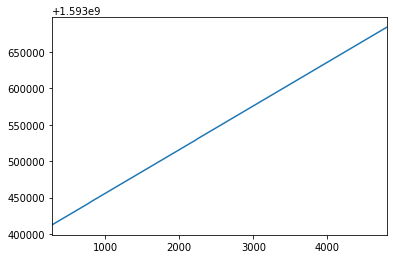

In [42]:
df_ori_typeN['v_/time'][:1000].plot.line()

# Split ori_data

In [29]:
columns = df_ori_typeN.columns
cut_num = 30

curr_column = []
curr_idx = 0

for i in range(1, len(columns[:-1])):
    curr_column.append(columns[i-1])
    curr_idx = curr_idx+1
    if(i % cut_num == 0):
        curr_df = pd.DataFrame(df_ori_typeN[curr_column])
        curr_column = []
        curr_df.to_csv('./data/cut'+str(cut_num)+'/'+str(curr_idx)+'.csv', index=False)

# Read dataset list

In [30]:
dataset_list = os.listdir('./data/cut'+str(cut_num))

try:
    dataset_list.remove('.DS_Store')
except:
    print('delete hiden dir')
    
dataset_list.sort(key=lambda x:int(x.split('.')[0]))
print(dataset_list)

['30.csv', '60.csv', '90.csv', '120.csv', '150.csv', '180.csv', '210.csv', '240.csv', '270.csv', '300.csv', '330.csv', '360.csv', '390.csv', '420.csv', '450.csv', '480.csv', '510.csv', '540.csv', '570.csv', '600.csv', '630.csv', '660.csv']


# Batch generated data

In [31]:
## Dataset parameters
seq_len = 5

## Newtork parameters
parameters = dict()

parameters['module'] = 'lstm' 
parameters['hidden_dim'] = 24
parameters['num_layer'] = 3
parameters['iterations'] = 10000
parameters['batch_size'] = 128

metric_iteration = 10


In [32]:
discriminative_score_list = []
predictive_score_list = []
df_generated_list = []
cal_score = False # it will take a long time

for dataset_name in dataset_list:
    data_name = dataset_name[:-4]
    
    # 1. Load data
    ori_data, scaler= real_data_loading(data_name, seq_len, mix=False, data_dir='./data/cut'+str(cut_num)+'/')
    print(data_name + ' dataset is ready.')
    
    # 2. Run TimeGAN
    generated_data = timegan(ori_data, parameters)   
    print('Finish Synthetic Data Generation')
    
    if cal_score:
        # 3. Discriminative score
        discriminative_score = list()
        for _ in range(metric_iteration):
            temp_disc = discriminative_score_metrics(ori_data, generated_data)
            discriminative_score.append(temp_disc)

        discriminative_score_list.append(np.round(np.mean(discriminative_score), 4))
        print('Discriminative score: ' + str(np.round(np.mean(discriminative_score), 4)))

        # 4. Predictive score
        predictive_score = list()
        for tt in range(metric_iteration):
            temp_pred = predictive_score_metrics(ori_data, generated_data)
            predictive_score.append(temp_pred)

        predictive_score_list.append(np.round(np.mean(predictive_score), 4))
        print('Predictive score: ' + str(np.round(np.mean(predictive_score), 4)))
    
    # 5. Recover data
    g_data = np.reshape(generated_data, (generated_data.shape[0] * generated_data.shape[1], generated_data.shape[2]))
    g_data = scaler.inverse_transform(g_data)
    df_generated = pd.DataFrame(g_data)
    
    df_ori = pd.read_csv('./data/cut'+str(cut_num)+'/'+data_name+'.csv')
    df_generated.columns = df_ori.columns
    df_generated_list.append(df_generated)

df_final = pd.concat(df_generated_list, axis=1)
print(df_final.shape)

30 dataset is ready.
Start Embedding Network Training
step: 0/10000, e_loss: 0.4114
step: 1000/10000, e_loss: 0.1727
step: 2000/10000, e_loss: 0.1684
step: 3000/10000, e_loss: 0.1746
step: 4000/10000, e_loss: 0.1717
step: 5000/10000, e_loss: 0.0854
step: 6000/10000, e_loss: 0.0781
step: 7000/10000, e_loss: 0.0756
step: 8000/10000, e_loss: 0.073
step: 9000/10000, e_loss: 0.0723
Finish Embedding Network Training
Start Training with Supervised Loss Only
step: 0/10000, s_loss: 0.2959
step: 1000/10000, s_loss: 0.1699
step: 2000/10000, s_loss: 0.1711
step: 3000/10000, s_loss: 0.1769
step: 4000/10000, s_loss: 0.1667
step: 5000/10000, s_loss: 0.1807
step: 6000/10000, s_loss: 0.1729
step: 7000/10000, s_loss: 0.1717
step: 8000/10000, s_loss: 0.1744
step: 9000/10000, s_loss: 0.1743
Finish Training with Supervised Loss Only
Start Joint Training
step: 0/10000, d_loss: 2.0778, g_loss_u: 0.6927, g_loss_s: 0.1588, g_loss_v: 0.1806, e_loss_t0: 0.0842
step: 1000/10000, d_loss: 1.739, g_loss_u: 1.3815, g

step: 0/10000, s_loss: 0.386
step: 1000/10000, s_loss: 0.039
step: 2000/10000, s_loss: 0.0386
step: 3000/10000, s_loss: 0.0385
step: 4000/10000, s_loss: 0.033
step: 5000/10000, s_loss: 0.0254
step: 6000/10000, s_loss: 0.0214
step: 7000/10000, s_loss: 0.025
step: 8000/10000, s_loss: 0.0258
step: 9000/10000, s_loss: 0.0266
Finish Training with Supervised Loss Only
Start Joint Training
step: 0/10000, d_loss: 2.081, g_loss_u: 0.6924, g_loss_s: 0.0436, g_loss_v: 0.3633, e_loss_t0: 0.0612
step: 1000/10000, d_loss: 0.8126, g_loss_u: 3.175, g_loss_s: 0.0329, g_loss_v: 0.0502, e_loss_t0: 0.0495
step: 2000/10000, d_loss: 0.8619, g_loss_u: 3.7753, g_loss_s: 0.0429, g_loss_v: 0.0735, e_loss_t0: 0.0485
step: 3000/10000, d_loss: 0.8923, g_loss_u: 4.0895, g_loss_s: 0.0379, g_loss_v: 0.0549, e_loss_t0: 0.05
step: 4000/10000, d_loss: 0.9495, g_loss_u: 4.1867, g_loss_s: 0.0345, g_loss_v: 0.031, e_loss_t0: 0.0419
step: 5000/10000, d_loss: 0.8664, g_loss_u: 3.3464, g_loss_s: 0.0433, g_loss_v: 0.0339, e_lo

step: 1000/10000, d_loss: 1.1782, g_loss_u: 1.5898, g_loss_s: 0.1773, g_loss_v: 0.0334, e_loss_t0: 0.0495
step: 2000/10000, d_loss: 1.2745, g_loss_u: 1.5812, g_loss_s: 0.1611, g_loss_v: 0.0287, e_loss_t0: 0.0419
step: 3000/10000, d_loss: 1.4499, g_loss_u: 1.3782, g_loss_s: 0.152, g_loss_v: 0.0447, e_loss_t0: 0.0386
step: 4000/10000, d_loss: 1.3972, g_loss_u: 1.522, g_loss_s: 0.1444, g_loss_v: 0.0372, e_loss_t0: 0.039
step: 5000/10000, d_loss: 1.2246, g_loss_u: 1.5929, g_loss_s: 0.1394, g_loss_v: 0.0344, e_loss_t0: 0.0363
step: 6000/10000, d_loss: 1.3733, g_loss_u: 1.5219, g_loss_s: 0.1387, g_loss_v: 0.0262, e_loss_t0: 0.037
step: 7000/10000, d_loss: 1.1938, g_loss_u: 1.5748, g_loss_s: 0.1361, g_loss_v: 0.0291, e_loss_t0: 0.0361
step: 8000/10000, d_loss: 1.3928, g_loss_u: 1.4, g_loss_s: 0.1339, g_loss_v: 0.044, e_loss_t0: 0.0335
step: 9000/10000, d_loss: 1.3419, g_loss_u: 1.7646, g_loss_s: 0.134, g_loss_v: 0.0337, e_loss_t0: 0.0339
Finish Joint Training
Finish Synthetic Data Generation


step: 5000/10000, d_loss: 1.75, g_loss_u: 0.9715, g_loss_s: 0.0634, g_loss_v: 0.034, e_loss_t0: 0.0281
step: 6000/10000, d_loss: 1.7995, g_loss_u: 0.9188, g_loss_s: 0.0637, g_loss_v: 0.0244, e_loss_t0: 0.0248
step: 7000/10000, d_loss: 1.5558, g_loss_u: 1.2968, g_loss_s: 0.0629, g_loss_v: 0.0258, e_loss_t0: 0.0198
step: 8000/10000, d_loss: 1.5408, g_loss_u: 1.3205, g_loss_s: 0.0599, g_loss_v: 0.0222, e_loss_t0: 0.0179
step: 9000/10000, d_loss: 1.4449, g_loss_u: 1.3673, g_loss_s: 0.0625, g_loss_v: 0.0241, e_loss_t0: 0.0184
Finish Joint Training
Finish Synthetic Data Generation
420 dataset is ready.
Start Embedding Network Training
step: 0/10000, e_loss: 0.4139
step: 1000/10000, e_loss: 0.1645
step: 2000/10000, e_loss: 0.1595
step: 3000/10000, e_loss: 0.0399
step: 4000/10000, e_loss: 0.0333
step: 5000/10000, e_loss: 0.0319
step: 6000/10000, e_loss: 0.0315
step: 7000/10000, e_loss: 0.0306
step: 8000/10000, e_loss: 0.026
step: 9000/10000, e_loss: 0.0305
Finish Embedding Network Training
Sta

step: 9000/10000, d_loss: 1.5182, g_loss_u: 1.2881, g_loss_s: 0.0715, g_loss_v: 0.0709, e_loss_t0: 0.0501
Finish Joint Training
Finish Synthetic Data Generation
540 dataset is ready.
Start Embedding Network Training
step: 0/10000, e_loss: 0.3106
step: 1000/10000, e_loss: 0.2347
step: 2000/10000, e_loss: 0.0578
step: 3000/10000, e_loss: 0.0543
step: 4000/10000, e_loss: 0.0596
step: 5000/10000, e_loss: 0.0564
step: 6000/10000, e_loss: 0.0524
step: 7000/10000, e_loss: 0.0498
step: 8000/10000, e_loss: 0.0479
step: 9000/10000, e_loss: 0.0456
Finish Embedding Network Training
Start Training with Supervised Loss Only
step: 0/10000, s_loss: 0.2533
step: 1000/10000, s_loss: 0.0227
step: 2000/10000, s_loss: 0.0215
step: 3000/10000, s_loss: 0.0184
step: 4000/10000, s_loss: 0.0197
step: 5000/10000, s_loss: 0.0255
step: 6000/10000, s_loss: 0.0176
step: 7000/10000, s_loss: 0.0191
step: 8000/10000, s_loss: 0.0226
step: 9000/10000, s_loss: 0.0192
Finish Training with Supervised Loss Only
Start Joint T

step: 6000/10000, e_loss: 0.0568
step: 7000/10000, e_loss: 0.0542
step: 8000/10000, e_loss: 0.0441
step: 9000/10000, e_loss: 0.0427
Finish Embedding Network Training
Start Training with Supervised Loss Only
step: 0/10000, s_loss: 0.2947
step: 1000/10000, s_loss: 0.0545
step: 2000/10000, s_loss: 0.0567
step: 3000/10000, s_loss: 0.0463
step: 4000/10000, s_loss: 0.0756
step: 5000/10000, s_loss: 0.0561
step: 6000/10000, s_loss: 0.0583
step: 7000/10000, s_loss: 0.0628
step: 8000/10000, s_loss: 0.058
step: 9000/10000, s_loss: 0.0541
Finish Training with Supervised Loss Only
Start Joint Training
step: 0/10000, d_loss: 2.0817, g_loss_u: 0.6893, g_loss_s: 0.0568, g_loss_v: 0.4877, e_loss_t0: 0.0544
step: 1000/10000, d_loss: 1.3144, g_loss_u: 1.4245, g_loss_s: 0.0535, g_loss_v: 0.0552, e_loss_t0: 0.0405
step: 2000/10000, d_loss: 1.4111, g_loss_u: 1.1921, g_loss_s: 0.0505, g_loss_v: 0.0405, e_loss_t0: 0.0368
step: 3000/10000, d_loss: 1.3066, g_loss_u: 1.3542, g_loss_s: 0.0517, g_loss_v: 0.0436, e

In [33]:
print(discriminative_score_list)
print(predictive_score_list)

[]
[]


In [34]:
# type 3 : interface-down
# type 5 : tap-loss-start
# type 9 : ixnetwork-bgp-injection-start
# type 11: ixnetwork-bgp-hijacking-start

df_final['v_type'] = 'tap-loss-start'
df_final['v_type_code'] = 57

In [35]:
df_final.head()

,p_/computes0/service/id,p_/computes0/vcpus_used,p_/computes0/vcpus,p_/computes0/memory_mb_used,p_/computes0/memory_mb,p_/computes0/cpu_info/topology/cores,p_/computes0/cpu_info/topology/cells,p_/computes0/cpu_info/topology/threads,p_/computes0/cpu_info/topology/sockets,p_/computes0/running_vms,...,v_/ports#link-tr-tr-a-1-y/metrics/network-incoming-bytes-rate,v_/ports#link-tr-tr-a-1-y/metrics/network-incoming-packets,v_/ports#link-tr-tr-a-1-y/metrics/network-incoming-packets-rate,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-bytes,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-bytes-rate,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-rate,v_/time,v_type,v_type_code
0,16.0,20.0,48.0,41472.0,257790.0,12.0,2.0,2.0,1.0,5.0,...,14.549364,1.458951e+06,0.112535,2.239770e+08,14.465632,1.333644e+06,0.117972,1.593673e+09,tap-loss-start,57
1,16.0,20.0,48.0,41472.0,257790.0,12.0,2.0,2.0,1.0,5.0,...,17.134729,1.458844e+06,0.141067,2.236826e+08,17.569160,1.333709e+06,0.159044,1.593675e+09,tap-loss-start,57
2,16.0,20.0,48.0,41472.0,257790.0,12.0,2.0,2.0,1.0,5.0,...,12.562846,1.458828e+06,0.112164,2.238827e+08,13.485488,1.333960e+06,0.121818,1.593677e+09,tap-loss-start,57
3,16.0,20.0,48.0,41472.0,257790.0,12.0,2.0,2.0,1.0,5.0,...,14.442591,1.458547e+06,0.119098,2.238611e+08,14.025536,1.333718e+06,0.131301,1.593675e+09,tap-loss-start,57
4,16.0,20.0,48.0,41472.0,257790.0,12.0,2.0,2.0,1.0,5.0,...,9.969013,1.458687e+06,0.097508,2.239302e+08,12.786714,1.333667e+06,0.107208,1.593674e+09,tap-loss-start,57


In [36]:
df_final.shape

(8510, 662)

In [37]:
df_final.to_csv('./data/generated_all_data.csv', index=False)

<AxesSubplot:>

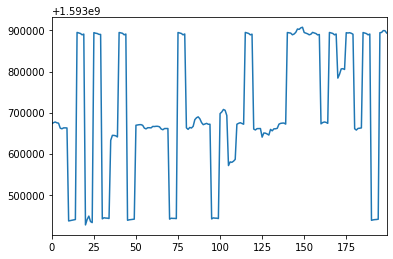

In [44]:
df_final['v_/time'][:200].plot.line()